<a href="https://colab.research.google.com/github/SinaiAvalos/Equipo20/blob/main/Avance1_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre del Trabajo:
AI for Good: Human Heritage
Automatic pre-Hispanic to Spanish Recogniser and Translator


Nombre del asesor del proyecto: Dr. Juan Arturo Nolazco Flores

Equipo: 20
Nombre de alumnos:
 * Juan Carlos Garza Sanchez	A00821522
 * Sinaí Avalos Rivera 			A01730466


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
df = pd.read_csv("hf://datasets/somosnlp-hackathon-2022/Axolotl-Spanish-Nahuatl/train.csv")
df = df[['sp', 'nah']].rename(columns={'sp': 'spanish', 'nah': 'nahuatl'})
df

,spanish,nahuatl
0,"Y así, cuando hizo su ofrenda de fuego, se sie...",Auh in ye yuhqui in on tlenamacac niman ye ic ...
1,"¿Si es jade, si es oro, acaso no tendrá que ir...","¿In chalchihuitl, teocuitlatl, mach ah ca on yaz?"
2,"Y cuando el Sol estuvo solo en el cielo, enseg...",Auh yn oyuh in yoca hualmotlalli tonatiuh ylhu...
3,Allá acudieron asimismo los señores del cabild...,Yn oncan mohuicatza yhuan yn ciudad cabildo tl...
4,Usos:,Kualtia:
...,...,...
20023,"El Espíritu y la esposa dicen: ""¡Ven!""El que ...",On Espíritu Santo niman isihuau on Borreguito ...
20024,Yo advierto a todo el que oye las palabras de...,Nemechtlachicahuilia nenmochimej yejhuan nenqu...
20025,y si alguno quita de las palabras del libro d...,Niman tla yacaj quipopolohuilis itemachtil Dio...
20026,"El que da testimonio de estas cosas dice: ""¡S...","On yejhuan quipantlantia yejhua in, ijquin qui..."


Tamaño del dataset

In [ ]:
print("Shape of dataset", df.shape)

Shape of dataset (20028, 2)


¿Hay valores faltantes en el conjunto de datos?

In [ ]:
print(df.isnull().sum())

missing_data_rows = df[df.isnull().any(axis=1)]

print(missing_data_rows)

spanish    4
nahuatl    4
dtype: int64
     spanish nahuatl
2444     NaN     NaN
4524     NaN     NaN
5399     NaN     NaN
8400     NaN     NaN


Remover filas con valores faltantes. Decidimos remover las filas debido a que nuestro objetivo es realizar traduccion y no tendría sentido utilizar los datos si no tenemos su traduccion en español o nahuatl. Además en este caso podemos ver que tenemos valores faltantes en ambas columnas entonces no hay datos tanto en español como en nahuatl. Al eliminar las filas no hay perdida de datos.

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
print(df.isnull().sum())

spanish    0
nahuatl    0
dtype: int64


Cambiamos el tipo de dato a string ya que estamos trabajando con cadenas de texto

In [ ]:
df = df.astype(str)

Visualizacion de distribución de tamaño de las oraciones

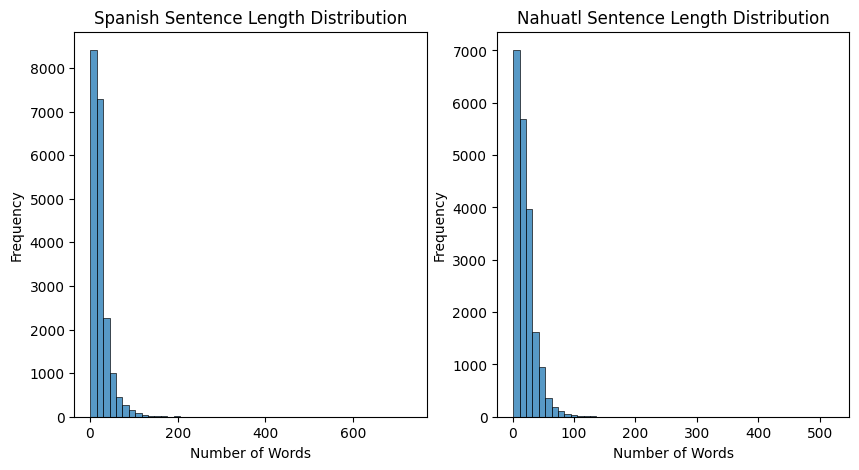

In [ ]:
df_spanish_len = df['spanish'].str.split().str.len()
df_nahuatl_len = df['nahuatl'].str.split().str.len()V

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_spanish_len, bins=50)
plt.title("Spanish Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df_nahuatl_len, bins=50)
plt.title("Nahuatl Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Distribucion de palabras unicas

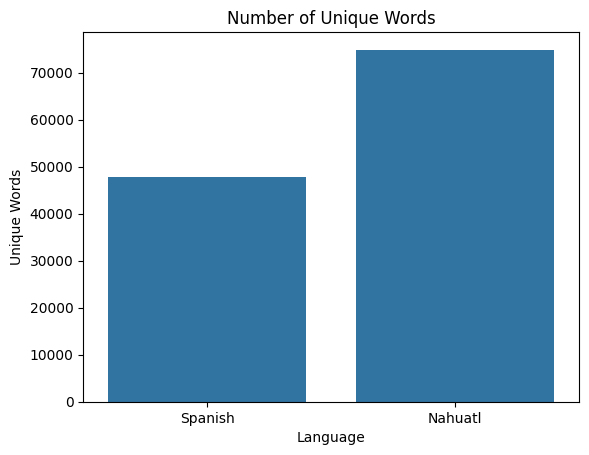

In [ ]:
df_spanish_words = df['spanish'].str.split()
df_nahuatl_words = df['nahuatl'].str.split()

unique_spanish_words = set(word for sublist in df_spanish_words.tolist() for word in sublist)
unique_nahuatl_words = set(word for sublist in df_nahuatl_words.tolist() for word in sublist)

data = {'Language': ['Spanish', 'Nahuatl'],
        'Unique Words': [len(unique_spanish_words), len(unique_nahuatl_words)]}
unique_words_df = pd.DataFrame(data)

sns.barplot(x='Language', y='Unique Words', data=unique_words_df)
plt.title("Number of Unique Words")
plt.show()

Visualizacion de la frecuencia de las 10 palabras más comunes

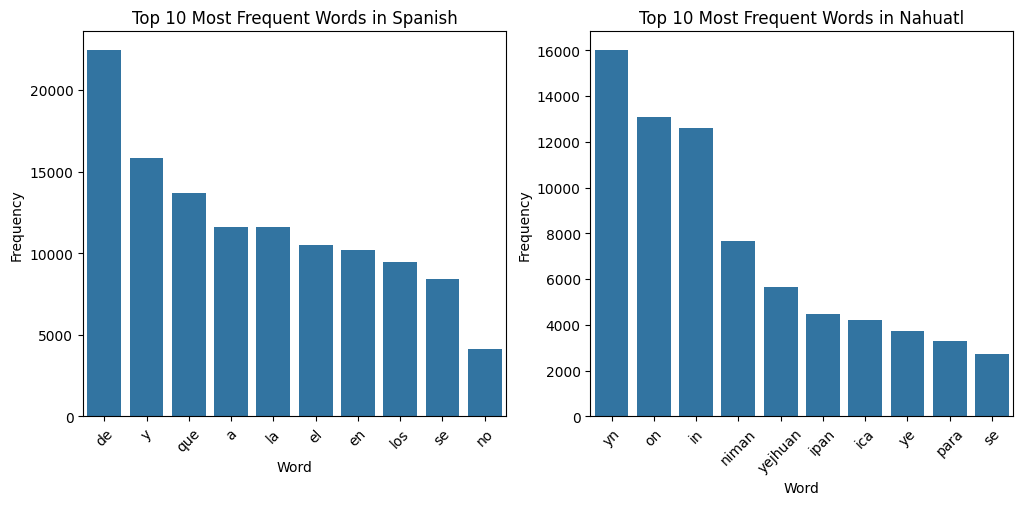

In [ ]:
all_spanish_words = [word for sublist in df_spanish_words.tolist() for word in sublist]
all_nahuatl_words = [word for sublist in df_nahuatl_words.tolist() for word in sublist]

top_n = 10
freq_spanish = Counter(all_spanish_words).most_common(top_n)
freq_nahuatl = Counter(all_nahuatl_words).most_common(top_n)

spanish_freq_df = pd.DataFrame(freq_spanish, columns=['Word', 'Frequency'])
nahuatl_freq_df = pd.DataFrame(freq_nahuatl, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Word', y='Frequency', data=spanish_freq_df)
plt.title("Top 10 Most Frequent Words in Spanish")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Word', y='Frequency', data=nahuatl_freq_df)
plt.title("Top 10 Most Frequent Words in Nahuatl")
plt.xticks(rotation=45)

plt.show()